In [122]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## World Happiness Report

- UN산하의 자문 기관 SDSN에서 2012년부터 발표하고 있는 World Happiness Report의 데이터 
- Ladder Score : 행복 지수 

#### Ladder Socre에 영향을 끼친 6가지 요인

- Logged GDP per capita : 1인당 GDP 수준 (1인당 소득수준)
- Social Support : 어려움에 처했을 때, 도움을 요청할 가족 혹은 친구가 있는가? (사회적 지지도)
- Healthy Life Expectancy : 출생부터 건강하게 살 수 있는 수명 (건강 기대 수명)
- Freedom to make life choices : 선택의 자유에 만족/불만족 하는가? (선택의 자유)
- Generosity : 지난 달 기부를 했는가 (기부 수준)
- Perceptions of corruption : 기업 혹은 정부 전반에 부정 부패가 만연한가? (부정부패 인식)


In [123]:
happiness_df = pd.read_csv('./world-happiness-report-2021.csv')

### 1. 분석의 목적과 변수 확인
- 6가지 요인들이 행복 지수에 어떻게 영향을 끼치는지 확인
- 지역별로도 확인

In [93]:
happiness_df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [94]:
# 각 Column의 데이터 타입 확인하기

happiness_df.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

### 2. 데이터 전체적으로 살펴보기
- 이상치, 결측치 확인 -> 없다!

In [95]:
happiness_df.describe()
# 중앙값과 max값을 비교해봤을 때 대부분 비슷하다. 이상치가 없는 것 같다.

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [96]:
happiness_df.isnull().sum() 
# 결측치가 전혀 없다!

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

### 3. 데이터의 개별 속성 파악하기

### Ladder score와 6가지 요인들
- **행복지수에 영향을 줄 수 있는 6가지 요인**에 대하여 어떤 양상을 보이는지 확인해보겠다.
- **예상 : Perceptions of corruption을 제외하면 모두 높을수록 행복지수도 높아질 것 같다.**
- 부정부패를 인식하고 있다면 행복지수는 떨어질 것 같다. 하지만, GDP는 반대로 높지 않으까?

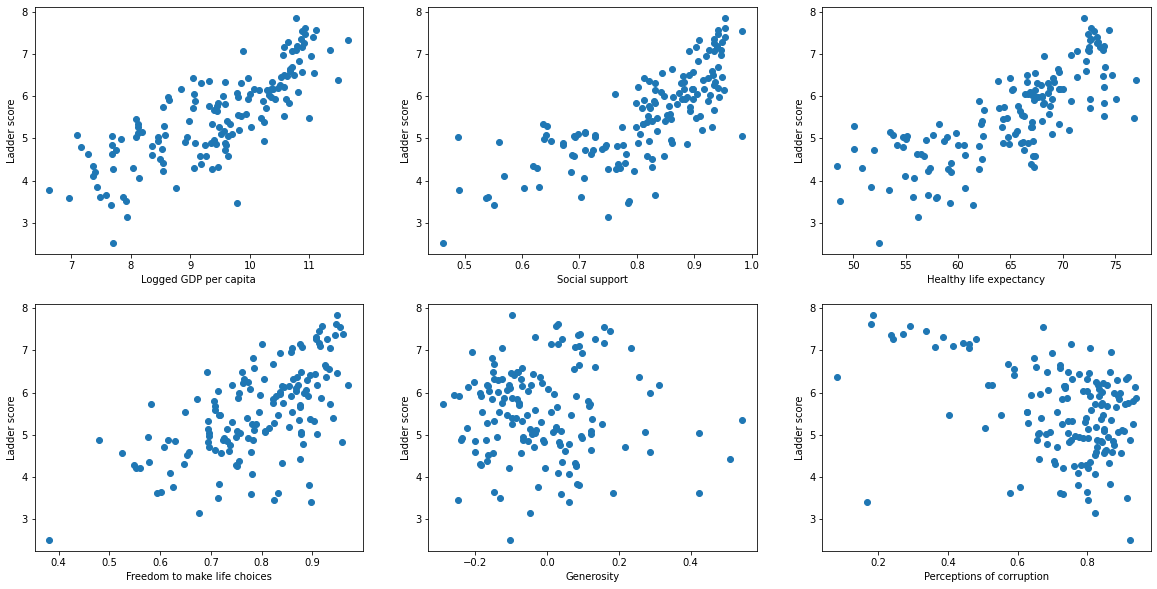

In [117]:
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.xlabel('Logged GDP per capita')
plt.ylabel('Ladder score')
plt.scatter(happiness_df['Logged GDP per capita'],happiness_df['Ladder score'])

plt.subplot(232)
plt.xlabel('Social support')
plt.ylabel('Ladder score')
plt.scatter(happiness_df['Social support'],happiness_df['Ladder score'])

plt.subplot(233)
plt.xlabel('Healthy life expectancy')
plt.ylabel('Ladder score')
plt.scatter(happiness_df['Healthy life expectancy'],happiness_df['Ladder score'])

plt.subplot(234)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Ladder score')
plt.scatter(happiness_df['Freedom to make life choices'],happiness_df['Ladder score'])

plt.subplot(235)
plt.xlabel('Generosity')
plt.ylabel('Ladder score')
plt.scatter(happiness_df['Generosity'],happiness_df['Ladder score'])

plt.subplot(236)
plt.xlabel('Perceptions of corruption')
plt.ylabel('Ladder score')
plt.scatter(happiness_df['Perceptions of corruption'],happiness_df['Ladder score'])

plt.show()

### 각 요인 별로 행복 지수를 확인해봤을 때 알 수 있는 점들
- 예상대로 완벽하게 나온 것은 **1인당 소득수준, 사회적 지지도, 건강 기대 수명**이다. -> 각 요인의 값이 높아질수록 행복지수도 높아졌다.
- **가장 예상과 다르게 나왔던 것은 기부 수준이었다.** 기부를 많이 할수록 행복 지수가 높을 줄 알았는데 오히려 대부분 0이하의 값이 나왔다. 그리고 기부 수준이 높게 나올수록 오히려 행복지수가 중간 아래였다. 
- 부정부패 인식의 정도는 예상했던 대로 인식의 정도가 커질수록 행복지수도 낮아졌지만 정도가 심하지 않았다. 그리고 오히려 대부분의 나라들이 부정부패 인식 수준이 매우 높았고, 그에 따른 행복지수는 4~7에 몰려있다. 
- 선택의 자유는 요즘 시대엔 대부분 높았다. 그래서 그런지 아무리 선택의 자유가 높아봤자 행복지수가 반드시 높은게 아니다.

### Regional indicator에 따라서 값들이 어떻게 변화할까?
- 각 지역별로 ladder score는 어떤지 (예상 : 유럽, 미국이 높을 것이다.) -> 맞았다!
- 잘 사는 나라(1인당 소득 수준이 높은 나라)는 기부 수준이 어떨까? -> **어떻게 표현해야할지 모르겠어서 우선 히트맵으로 했습니다. [지역, GDP, 기부] 이 3가지를 다 보이려면 어떤 그래프를 사용하는 것이 좋았을까요?**
- 오히려 중간정도의 소득 수준을 갖고 있는 나라들이 기부를 거의 하지 않았고 매우 잘 살거나 오히려 좀 소득 수준이 낮은 곳이 기부를 하고 있었습니다.

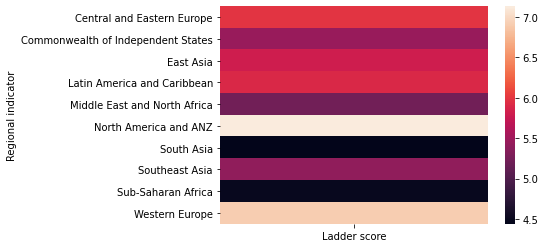

In [140]:
sns.heatmap(happiness_df[['Ladder score','Regional indicator']].groupby(['Regional indicator']).mean())
plt.show()

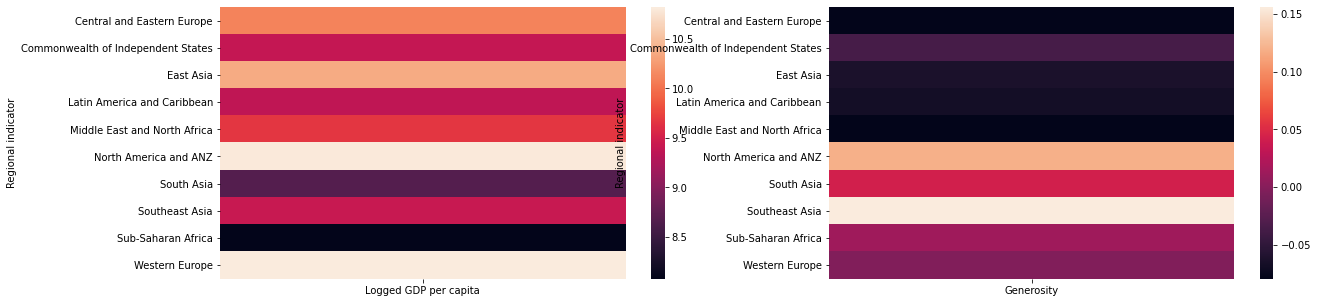

In [142]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.heatmap(happiness_df[['Logged GDP per capita','Regional indicator']].groupby(['Regional indicator']).mean())
plt.subplot(122)
sns.heatmap(happiness_df[['Regional indicator','Generosity']].groupby(['Regional indicator']).mean())
plt.show()